# Análise Exploratória dos Dados

In [1]:
import pandas as pd
import os

In [2]:
data_path = 'dataset'
files = [x for x in os.listdir(data_path) if x.endswith('.csv')]
files

['BD_DEM_TIME.csv', 'BD_CONSUMO.csv', 'BD_SERVICOS.csv']

## Variáveis de Ambiente

In [4]:
ano_atual = 2021
ano_antigo = 1900

# BD_DEM_TIME.csv

In [5]:
df_bem_time = pd.read_csv(os.path.join(data_path, 'BD_DEM_TIME.csv'))
df_bem_time['IDADE'] = ano_atual - df_bem_time['DTA_NASC']
df_bem_time

,KEY,SEXO,DTA_NASC,ESTADO,TIME,IDADE
0,2421280,M,1994.0,Minas Gerais,Cruzeiro,27.0
1,1604566,M,1990.0,Bahia,Flamengo,31.0
2,133472,M,1985.0,Rio de Janeiro,Botafogo,36.0
3,1069773,M,1989.0,Rio Grande do Sul,Gremio,32.0
4,2083240,M,1994.0,Sao Paulo,Santos,27.0
...,...,...,...,...,...,...
951459,2372668,M,1994.0,Rio Grande do Sul,Gremio,27.0
951460,1640963,M,1988.0,Sao Paulo,Sao Paulo,33.0
951461,810316,M,1982.0,Sao Paulo,Corinthians,39.0
951462,3113267,NaN,NaN,Rio de Janeiro,Botafogo,NaN


In [63]:
df_bem_time.dropna().shape

(909445, 6)

In [62]:
df_bem_time.describe()

,KEY,DTA_NASC,IDADE
count,9.514640e+05,914441.000000,914441.000000
mean,1.708691e+06,1987.162937,33.837063
std,9.852548e+05,28.814766,28.814766
min,3.000000e+00,0.000000,-7970.000000
25%,8.548928e+05,1983.000000,27.000000
50%,1.709532e+06,1989.000000,32.000000
75%,2.562060e+06,1994.000000,38.000000
max,3.414422e+06,9991.000000,2021.000000


<AxesSubplot:title={'center':'IDADE'}, ylabel='Frequency'>

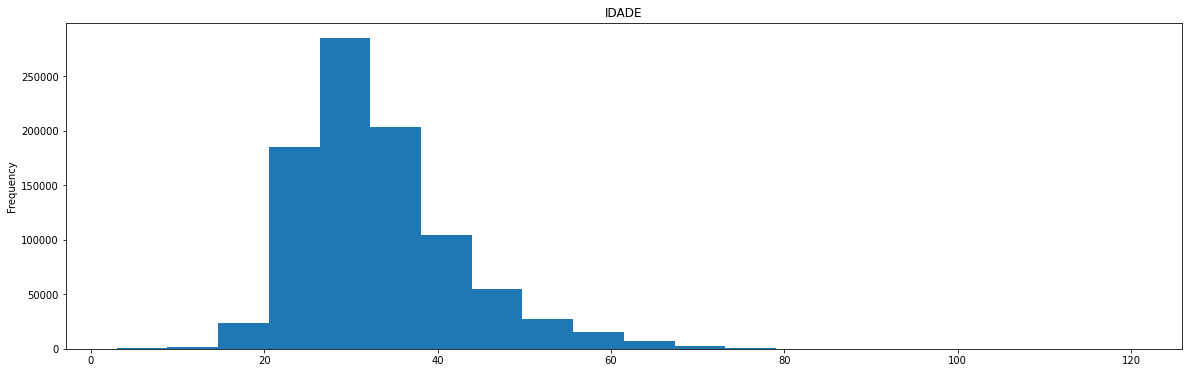

In [54]:
# Existem valores estranhos para Data de Nascimento
column='IDADE'
mask = (df_bem_time['DTA_NASC']>ano_antigo) & (df_bem_time['DTA_NASC']<ano_atual)
df_bem_time.loc[mask, column].plot.hist(figsize=(20, 6), title=column, bins=20)

<AxesSubplot:title={'center':'SEXO'}>

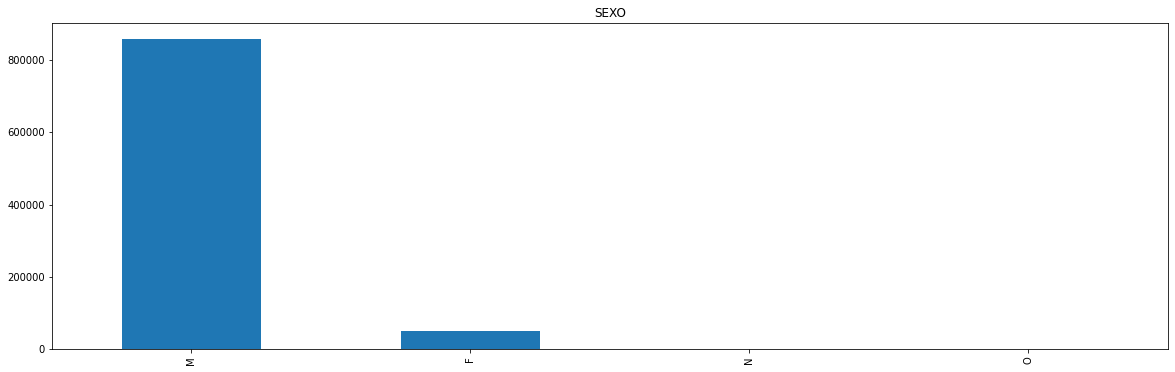

In [65]:
column='SEXO'
df_bem_time[column].value_counts().plot.bar(figsize=(20, 6), title=column)

<AxesSubplot:title={'center':'ESTADO'}>

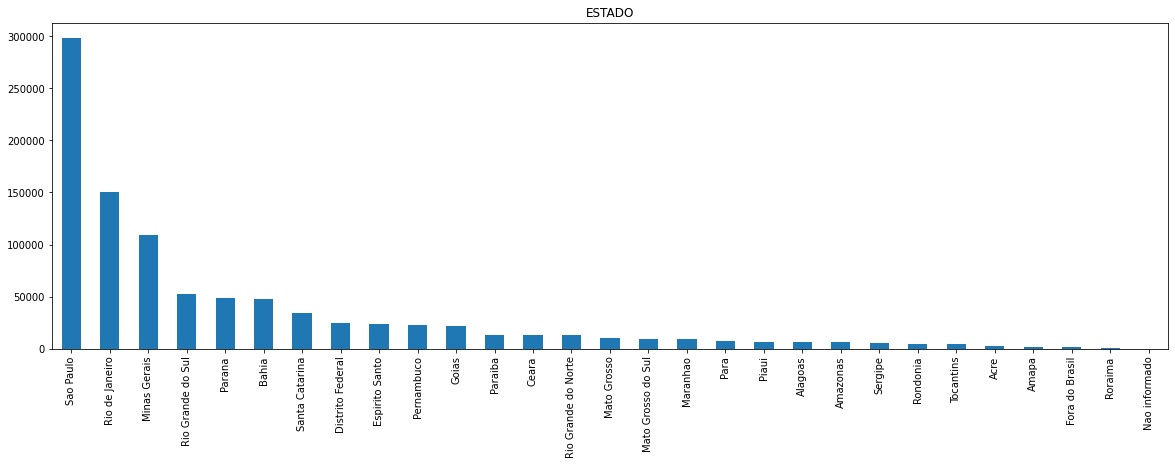

In [11]:
column = 'ESTADO'
df_bem_time[column].value_counts().plot.bar(figsize=(20, 6), title=column)

Total de Times: 29


<AxesSubplot:title={'center':'TIME'}>

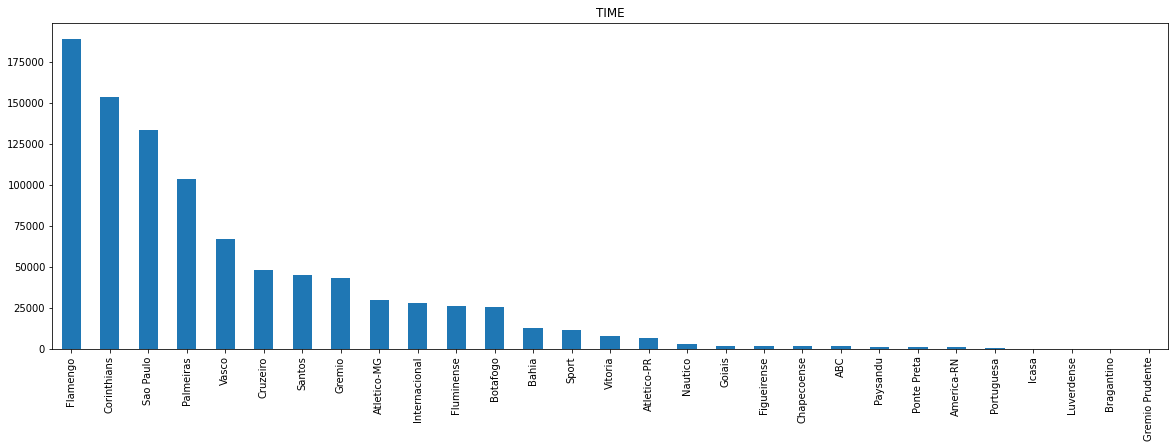

In [58]:
column='TIME'
print('Total de Times:', len(df_bem_time[column].unique()))
df_bem_time[column].value_counts().plot.bar(figsize=(20, 6), title=column)

# BD_CONSUMO.csv

In [155]:
df_consumo = pd.read_csv(os.path.join(data_path, 'BD_CONSUMO.csv'))
df_consumo.shape

(14174707, 3)

In [156]:
df_consumo = df_consumo.dropna()
df_consumo.shape

(14174706, 3)

In [157]:
df_consumo['pesquisa'] = df_consumo['url'].str.find('times') 
df_consumo

,KEY,tempo,url,pesquisa
0,1666965,1532.0,http://globoesporte.globo.com/mg/futebol/times...,33
1,2428750,965.0,https://globoesporte.globo.com/futebol/times/b...,31
2,23359,464.0,http://globoesporte.globo.com/pb/futebol/campe...,-1
3,2451676,3286.0,http://globoesporte.globo.com/sp/santos-e-regi...,49
4,707389,1195.0,http://globoesporte.globo.com/futebol/times/pa...,30
...,...,...,...,...
14174701,2836423,796.0,http://globoesporte.globo.com/futebol/times/fl...,30
14174702,3387468,822.0,https://globoesporte.globo.com/futebol/times/p...,31
14174703,1590140,738.0,http://globoesporte.globo.com/futebol/brasilei...,-1
14174704,2964465,1396.0,https://globoesporte.globo.com/futebol/times/a...,31


In [171]:
mask = df_consumo['pesquisa']!=-1
df_consumo.loc[mask, 'nome_time'] = df_consumo.loc[mask, 'url'].str.split("times/").str.get(1).str.split("/").str.get(0)

In [177]:
df_consumo.loc[df_consumo['nome_time']=='youtu.com', 'url']

13930489    https://globoesporte.globo.com/futebol/times/y...
Name: url, dtype: object

In [149]:
df_consumo['campeonato'] = df_consumo.loc[df_consumo['pesquisa']==-1, 'url'].str.split('futebol')[:-1]

In [150]:
df_consumo

,KEY,tempo,url,pesquisa,campeonato
0,1666965,1532.0,http://globoesporte.globo.com/mg/futebol/times...,41,NaN
1,2428750,965.0,https://globoesporte.globo.com/futebol/times/b...,39,NaN
2,23359,464.0,http://globoesporte.globo.com/pb/futebol/campe...,-1,"[http://globoesporte.globo.com/pb/, /campeonat..."
3,2451676,3286.0,http://globoesporte.globo.com/sp/santos-e-regi...,57,NaN
4,707389,1195.0,http://globoesporte.globo.com/futebol/times/pa...,38,NaN
...,...,...,...,...,...
14174701,2836423,796.0,http://globoesporte.globo.com/futebol/times/fl...,38,NaN
14174702,3387468,822.0,https://globoesporte.globo.com/futebol/times/p...,39,NaN
14174703,1590140,738.0,http://globoesporte.globo.com/futebol/brasilei...,-1,NaN
14174704,2964465,1396.0,https://globoesporte.globo.com/futebol/times/a...,39,NaN


In [122]:
df_consumo['url'][:-100].map(lambda x: x.split('/futebol/')[0].split('.com')[1])

0                           /mg
1                              
2                           /pb
3           /sp/santos-e-regiao
4                              
                   ...         
14174602    /sp/santos-e-regiao
14174603                       
14174604                       
14174605                       
14174606                    /ce
Name: url, Length: 14174607, dtype: object

In [117]:
[x for x in df_consumo['url'][0].split('/futebol/')[0].split('.com')[1]]

'/mg'

In [114]:
prefix, sufix = df_consumo['url'][0].split('/futebol/')
sufix = sufix.split('times/')[-1]

In [ ]:
column = 'tempo'
df_consumo.groupby('KEY')[[column]].sum()[column].plot.hist(figsize=(20, 6), title=column, bins=200)

In [87]:
df_consumo.groupby('KEY')[[column]].sum()[column]

KEY
3             464.0
8           19547.0
9          220290.0
10           3139.0
13          89422.0
             ...   
3414412      2661.0
3414419    137711.0
3414420     10162.0
3414421    207513.0
3414422     14746.0
Name: tempo, Length: 711705, dtype: float64

# BD_SERVICOS.csv

In [6]:
df_servicos = pd.read_csv(os.path.join(data_path, 'BD_SERVICOS.csv'))
df_servicos

,KEY,GLOBOPLAY,PREMIERE_PLAY,GLOBOSAT_PLAY,COMBATE,CARTOLA_PRO
0,2812202,0,0,0,0,0
1,609314,0,0,0,0,0
2,1837779,0,0,0,0,0
3,950603,0,0,0,0,0
4,2105538,0,0,1,0,0
...,...,...,...,...,...,...
951459,1278011,1,0,1,0,1
951460,2042105,1,0,0,0,1
951461,1898803,1,1,1,0,1
951462,3106291,1,0,1,0,1


In [7]:
df_servicos.describe() # São colunas categóricas de fato

,KEY,GLOBOPLAY,PREMIERE_PLAY,GLOBOSAT_PLAY,COMBATE,CARTOLA_PRO
count,9.514640e+05,951464.000000,951464.000000,951464.000000,951464.000000,951464.000000
mean,1.708691e+06,0.401452,0.185091,0.237106,0.017795,0.154316
std,9.852548e+05,0.490192,0.388371,0.425308,0.132205,0.361251
min,3.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.548928e+05,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.709532e+06,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.562060e+06,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.414422e+06,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

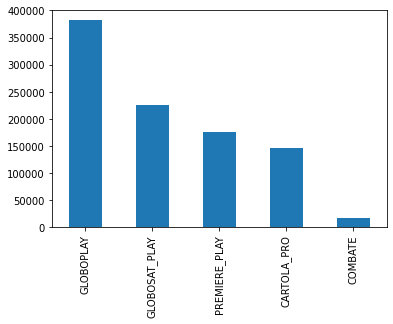

In [8]:
df_servicos.drop(columns=['KEY']).sum().sort_values(ascending=False).plot.bar()

# Concatenação

In [9]:
_df = df_servicos.set_index('KEY').join(df_bem_time.set_index('KEY'))
_df

,GLOBOPLAY,PREMIERE_PLAY,GLOBOSAT_PLAY,COMBATE,CARTOLA_PRO,SEXO,DTA_NASC,ESTADO,TIME,IDADE
KEY,,,,,,,,,,
2812202,0,0,0,0,0,M,1996.0,Sao Paulo,Corinthians,25.0
609314,0,0,0,0,0,M,1998.0,Parana,Palmeiras,23.0
1837779,0,0,0,0,0,M,1991.0,Rio de Janeiro,Botafogo,30.0
950603,0,0,0,0,0,M,1987.0,Sao Paulo,Sao Paulo,34.0
2105538,0,0,1,0,0,M,1994.0,Sao Paulo,Palmeiras,27.0
...,...,...,...,...,...,...,...,...,...,...
1278011,1,0,1,0,1,M,1997.0,Sao Paulo,Sao Paulo,24.0
2042105,1,0,0,0,1,M,1984.0,Sao Paulo,Ponte Preta,37.0
1898803,1,1,1,0,1,M,1976.0,Rio Grande do Norte,Flamengo,45.0


In [10]:
y_categories = _df['TIME'].astype('category').cat.categories
_df['TIME'] = _df['TIME'].astype('category').cat.codes

In [11]:
dummies_estado = pd.get_dummies(_df['ESTADO'])
_df = pd.concat([_df, dummies_estado], axis=1).drop(columns=['ESTADO'])

In [12]:
_df = _df.drop(columns=['DTA_NASC'])
_df

,GLOBOPLAY,PREMIERE_PLAY,GLOBOSAT_PLAY,COMBATE,CARTOLA_PRO,SEXO,TIME,IDADE,Acre,Alagoas,...,Piaui,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondonia,Roraima,Santa Catarina,Sao Paulo,Sergipe,Tocantins
KEY,,,,,,,,,,,,,,,,,,,,,
2812202,0,0,0,0,0,M,8,25.0,0,0,...,0,0,0,0,0,0,0,1,0,0
609314,0,0,0,0,0,M,20,23.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1837779,0,0,0,0,0,M,5,30.0,0,0,...,0,0,0,1,0,0,0,0,0,0
950603,0,0,0,0,0,M,25,34.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2105538,0,0,1,0,0,M,20,27.0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278011,1,0,1,0,1,M,25,24.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2042105,1,0,0,0,1,M,22,37.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1898803,1,1,1,0,1,M,11,45.0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [13]:
dummies_sexo = pd.get_dummies(_df['SEXO'])
_df = pd.concat([_df, dummies_sexo], axis=1).drop(columns=['SEXO'])
_df

,GLOBOPLAY,PREMIERE_PLAY,GLOBOSAT_PLAY,COMBATE,CARTOLA_PRO,TIME,IDADE,Acre,Alagoas,Amapa,...,Rondonia,Roraima,Santa Catarina,Sao Paulo,Sergipe,Tocantins,F,M,N,O
KEY,,,,,,,,,,,,,,,,,,,,,
2812202,0,0,0,0,0,8,25.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
609314,0,0,0,0,0,20,23.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1837779,0,0,0,0,0,5,30.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
950603,0,0,0,0,0,25,34.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2105538,0,0,1,0,0,20,27.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278011,1,0,1,0,1,25,24.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2042105,1,0,0,0,1,22,37.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1898803,1,1,1,0,1,11,45.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
target_column = 'TIME'
X, y = _df.drop(columns=[target_column]), _df[target_column]

In [15]:
X = X.drop(columns=['IDADE']) # Tem nulos
# Uma opção seria colocar os valores não conhecidos e nulos para um valor negativo, ex: -1
# outra solução é simplesmente ignorar a coluna de idade, vale um teste.

In [16]:
X.shape, X.dropna().shape

((951464, 38), (951464, 38))

In [103]:
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [107]:
clf = make_pipeline(StandardScaler(), LinearSVC(C=0.1))
clf.fit(X_train[:10000], y_train[:10000])

/Users/Betine/anaconda3/envs/Globo_Case/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=0.1))])

In [108]:
y_pred = clf.predict(X_test)
print('ACC:', accuracy_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred, average='weighted'))

ACC: 0.3775335929330033
F1: 0.25521373759262317


<AxesSubplot:title={'center':'Matriz de Confusão Normalizada'}>

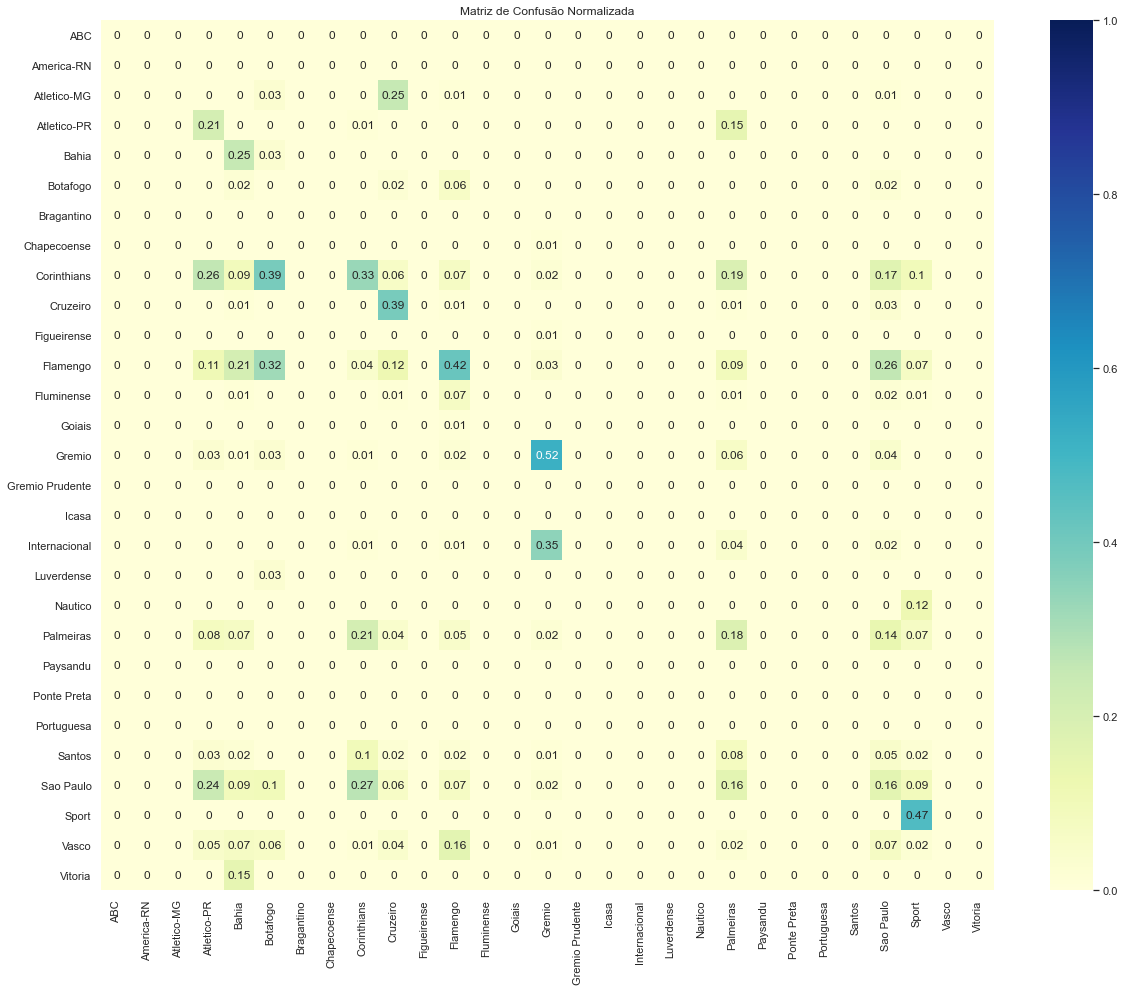

In [112]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(np.round(cnf_matrix/(cnf_matrix.sum(axis=0)+1e-7), 2), index = y_categories,
                  columns = y_categories)
plt.figure(figsize = (20, 16))
plt.title('Matriz de Confusão Normalizada')
sn.heatmap(df_cm, annot=True, vmin=0, vmax=1, cmap="YlGnBu")

## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)